# Investigate embeddings of PLA2

In [1]:
import torch
import numpy as np
import pandas as pd
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
embedding_file = '/mnt/f/nicole/embeddings/pla2_esm2_embeddings.h5'

embeddings = []

# load the entire h5 file 
with h5py.File(embedding_file, 'r') as f:
    for embedding in f.values():
        embeddings.append(embedding[:])

In [3]:
# concatenate all the embeddings 
embeddings = np.concatenate(embeddings, axis=0)
embeddings.shape

(64321, 2560)

In [8]:
embeddings[0:2].mean().mean()

0.0009738632

In [4]:
# describe the embeddings
stats_embeddings = pd.DataFrame(embeddings).describe()
stats_embeddings

,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
count,64321.000000,64321.000000,64321.000000,64321.000000,64321.000000,64321.000000,64321.000000,64321.000000,64321.000000,64321.000000,...,64321.000000,64321.000000,64321.000000,64321.000000,64321.000000,64321.000000,64321.000000,64321.000000,64321.000000,64321.000000
mean,0.102924,0.072803,0.052803,-0.030802,-0.031710,0.021026,-0.089835,0.069314,-0.088720,0.090848,...,0.070383,-0.076287,0.031028,0.033523,0.013412,-0.001720,0.129243,0.075856,-0.131309,-0.056055
std,0.171993,0.135043,0.134048,0.143939,0.158858,0.132672,0.137400,0.137914,0.127128,0.138154,...,0.131041,0.130068,0.138089,0.127254,0.142933,0.140552,0.126296,0.133546,0.149977,0.135632
min,-0.542969,-0.318848,-0.474854,-0.453857,-0.608398,-0.402832,-0.515625,-0.418457,-0.522461,-0.412598,...,-0.419434,-0.589844,-0.362061,-0.378418,-0.445557,-0.418213,-0.408936,-0.354004,-0.684570,-0.633301
25%,-0.015045,-0.020706,-0.034698,-0.125732,-0.126587,-0.068604,-0.187378,-0.020660,-0.176392,-0.005096,...,-0.008408,-0.168457,-0.064148,-0.056671,-0.091003,-0.095825,0.043945,-0.026367,-0.228271,-0.142090
50%,0.100769,0.073364,0.052856,-0.030334,-0.021957,0.022842,-0.086609,0.074036,-0.092651,0.097656,...,0.067688,-0.072571,0.023682,0.038361,0.009140,-0.012299,0.131470,0.059204,-0.134888,-0.065125
75%,0.222778,0.156616,0.133057,0.059937,0.076233,0.117004,0.005085,0.159790,-0.011620,0.187744,...,0.150024,0.014992,0.121521,0.122864,0.112610,0.079163,0.212036,0.177246,-0.033905,0.032379
max,0.693848,0.554199,0.670898,0.396973,0.506348,0.426025,0.371582,0.589355,0.396484,0.584961,...,0.591309,0.426025,0.471191,0.495361,0.507812,0.637695,0.551270,0.523926,0.409668,0.424316


In [5]:
stats_embeddings.loc['mean'].mean()

0.0007885902905095498

<Axes: ylabel='mean'>

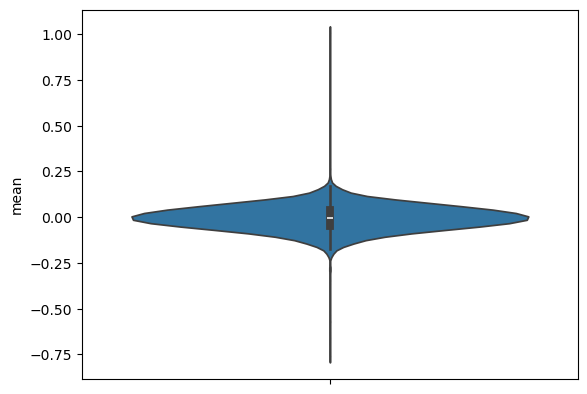

In [14]:
sns.violinplot(stats_embeddings.drop([1542], axis=1).loc['mean'])

<Axes: xlabel='mean', ylabel='Count'>

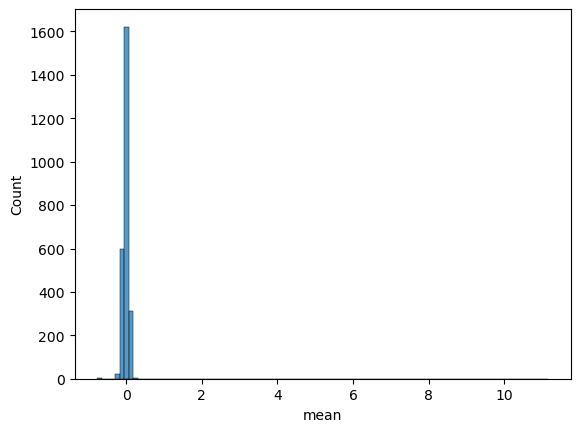

In [9]:
# show the distribution of the mean of the embeddings

sns.histplot(stats_embeddings.loc['mean'], bins=100)

Processing embeddings:   0%|          | 0/524 [00:00<?, ?it/s]

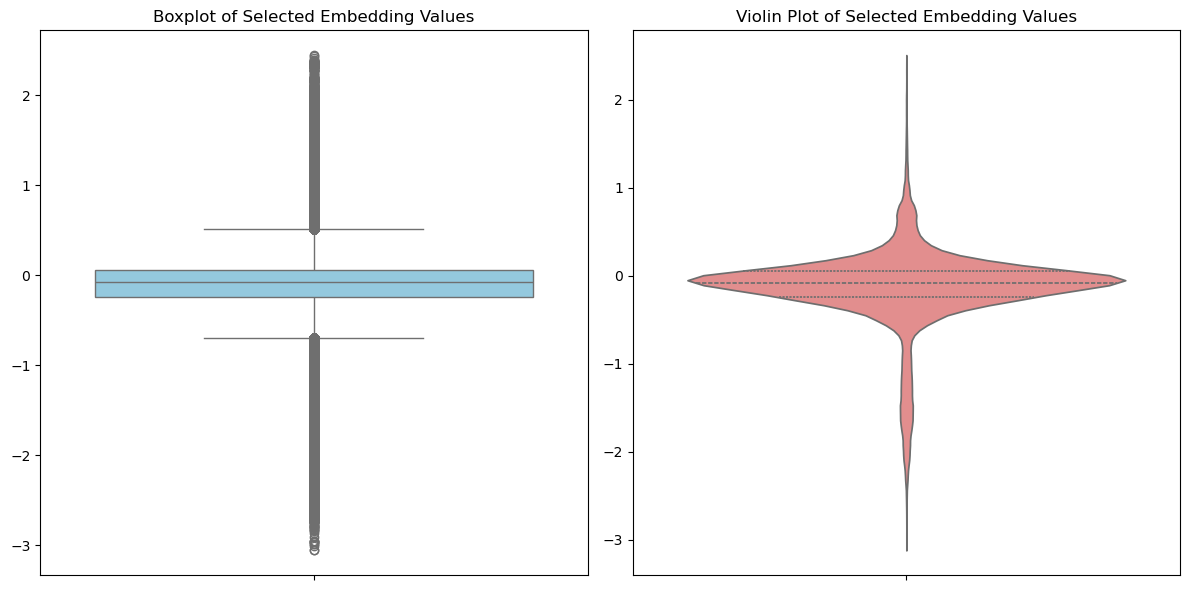

In [2]:
# Select embedding dimensions to extract
embedding_dimensions = [4, 716, 1116, 1512, 1535, 2282, 2327, 2482, 2527]

# Load and process embeddings one by one (no duplication, no extra storage)
embedding_file = '/mnt/f/nicole/embeddings/pla2_esm2_embeddings.h5'

with h5py.File(embedding_file, "r") as f:
    all_values = []
    
    for emb in tqdm(f.values(), desc="Processing embeddings", leave=False):
        emb_tensor = torch.from_numpy(np.array(emb, dtype=np.float32))  # Convert to Tensor
        selected_values = emb_tensor[:, embedding_dimensions].flatten().numpy()  # Select dims & flatten
        all_values.append(selected_values)  # Append to final storage

# Convert to a NumPy array (saves memory)
embedding_values = np.concatenate(all_values, axis=0)  
del all_values  # Free memory

# Plot
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=embedding_values, color="skyblue")
plt.title("Boxplot of Selected Embedding Values")

# Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(y=embedding_values, color="lightcoral", inner="quartile")
plt.title("Violin Plot of Selected Embedding Values")

plt.tight_layout()
plt.show()

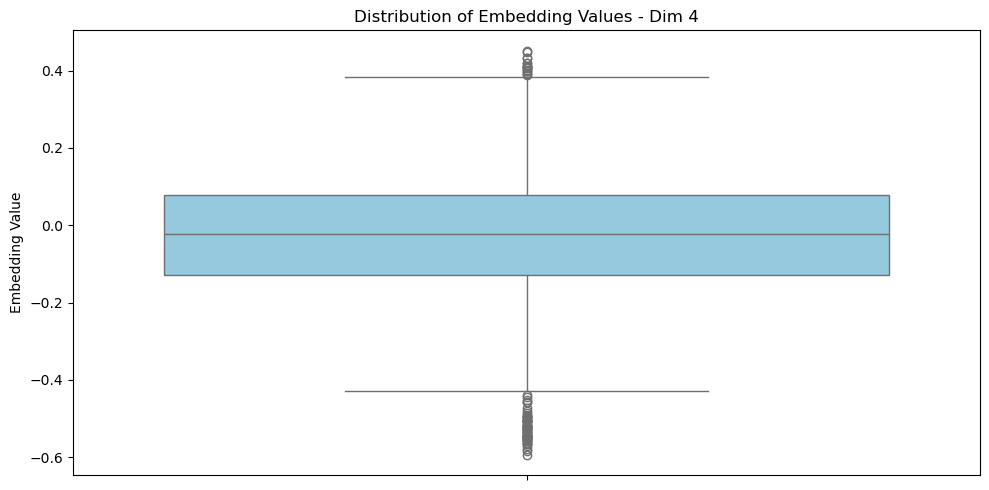

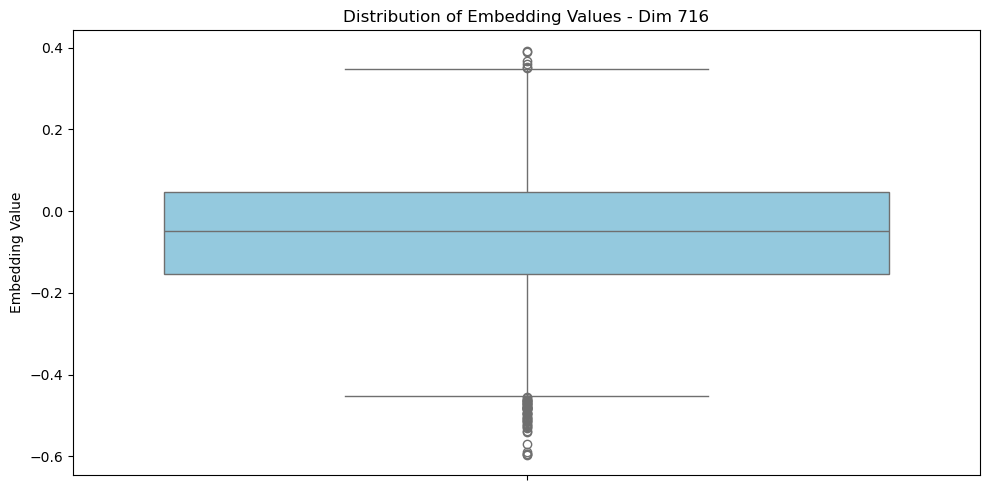

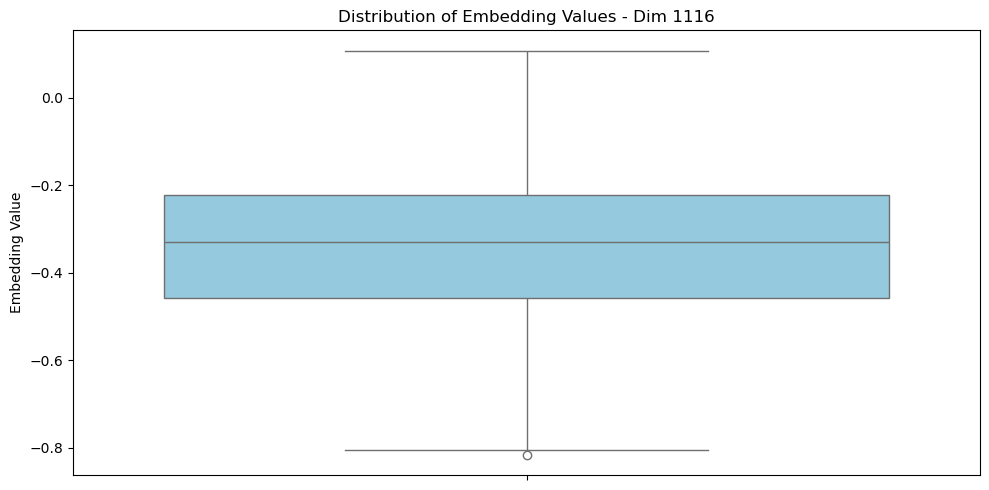

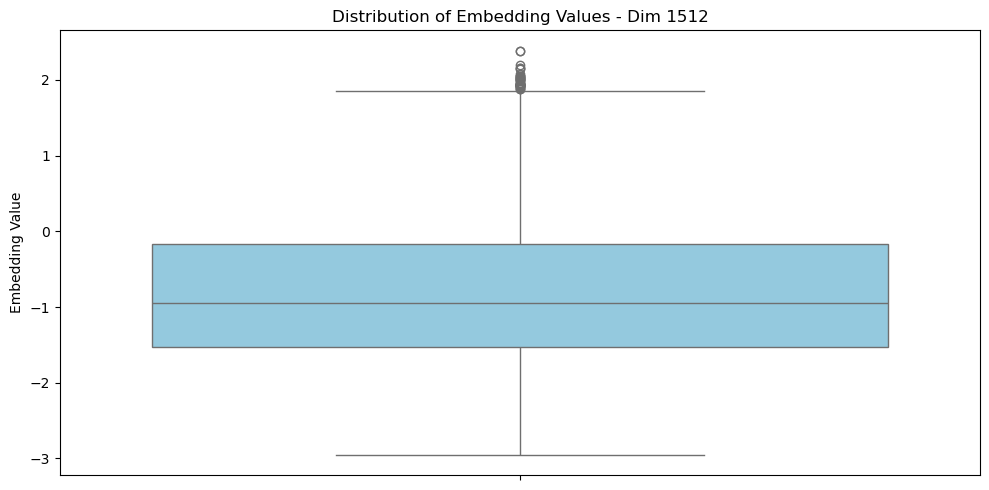

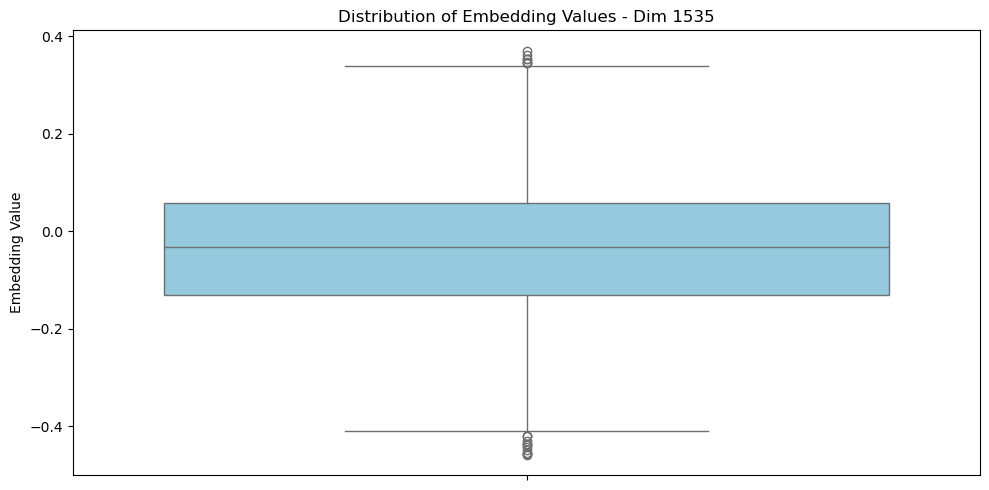

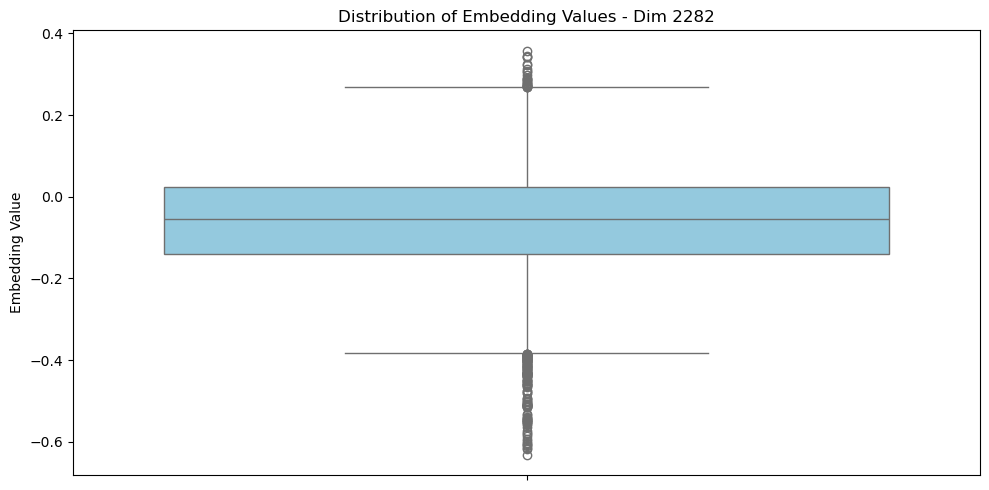

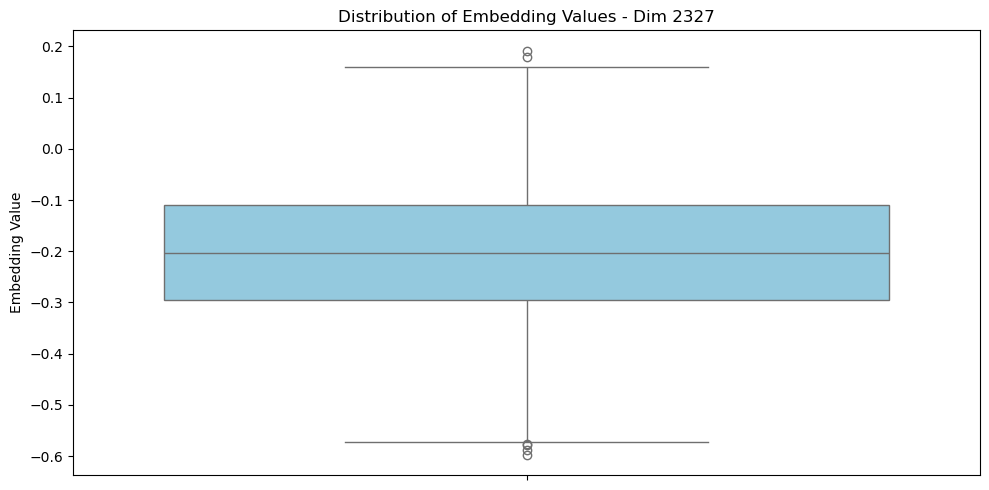

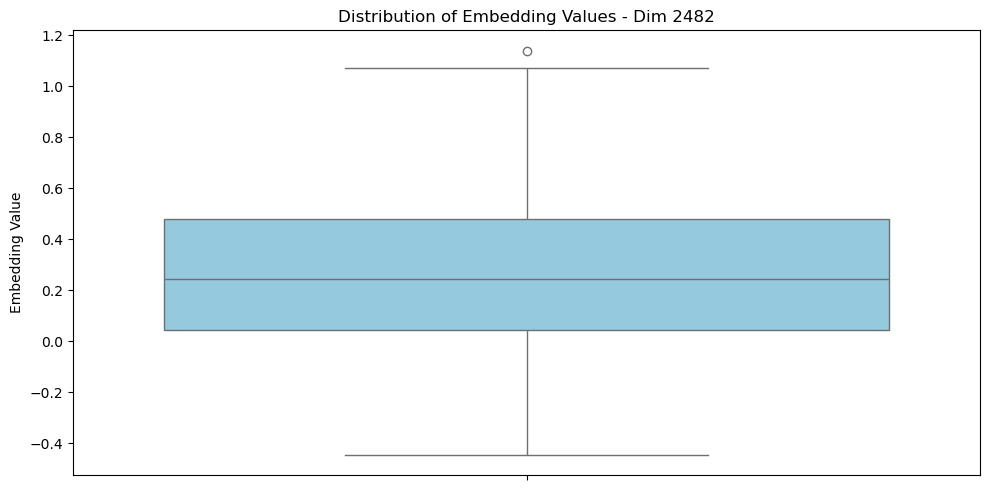

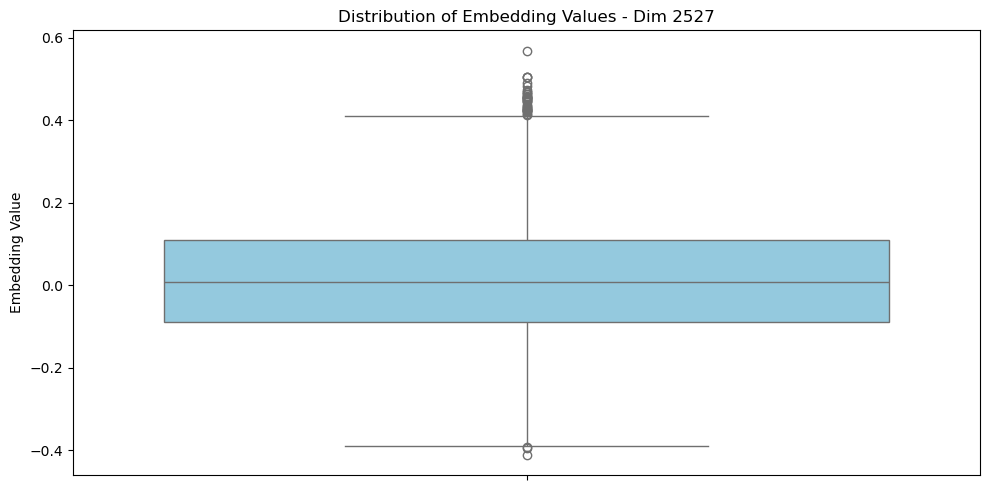

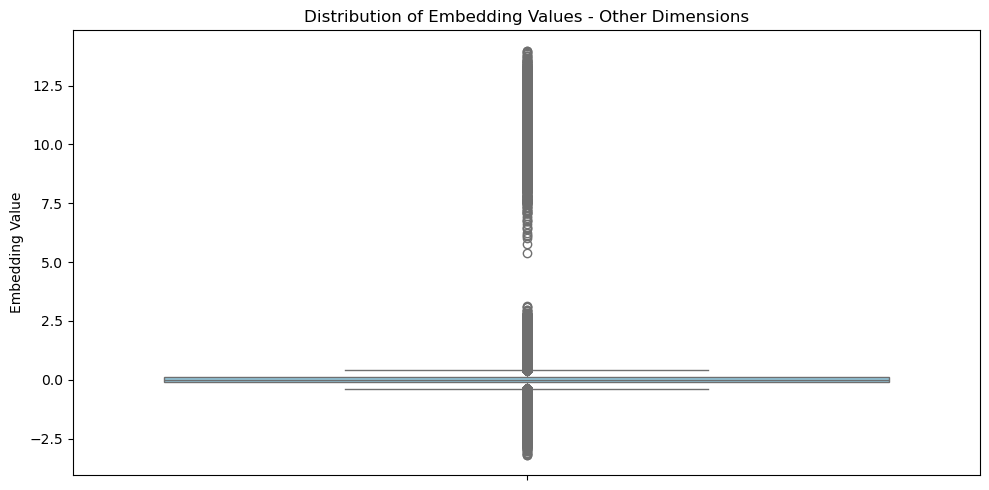

In [3]:
import torch
import numpy as np
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Select embedding dimensions to extract
embedding_dimensions = [4, 716, 1116, 1512, 1535, 2282, 2327, 2482, 2527]

# Load and process embeddings one by one (memory-efficient)
embedding_file = "/mnt/f/nicole/embeddings/pla2_esm2_embeddings.h5"

# Dictionary to store lists of values per embedding dimension
embedding_values = {f"Dim {dim}": [] for dim in embedding_dimensions}
embedding_values["Other Dimensions"] = []  # Group for all non-selected dimensions

with h5py.File(embedding_file, "r") as f:
    for emb in tqdm(f.values(), desc="Processing embeddings", leave=False):
        emb_tensor = torch.from_numpy(np.array(emb, dtype=np.float32))  # Convert to tensor

        # Extract selected dimensions efficiently
        selected_values = emb_tensor[:, embedding_dimensions].numpy()
        for i, dim in enumerate(embedding_dimensions):
            embedding_values[f"Dim {dim}"].extend(selected_values[:, i])  # Store each dim separately

        # Process remaining dimensions efficiently
        mask = np.ones(emb_tensor.shape[1], dtype=bool)
        mask[embedding_dimensions] = False  # Exclude selected dimensions
        other_values = emb_tensor[:, mask].flatten().numpy()  # Flatten only remaining values
        embedding_values["Other Dimensions"].extend(other_values)

# Convert lists to NumPy arrays (more efficient operations)
embedding_values = {key: np.array(val) for key, val in embedding_values.items()}

# Reduce data for visualization (avoid excessive points)
for key in embedding_values:
    embedding_values[key] = embedding_values[key][::10]  # Downsample for efficiency

# **Generate a separate plot for each embedding dimension**
for key in embedding_values:
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=embedding_values[key], color="skyblue")
    plt.title(f"Distribution of Embedding Values - {key}")
    plt.ylabel("Embedding Value")
    plt.tight_layout()
    plt.show()


In [64]:
import torch
import numpy as np
import h5py
from tqdm import tqdm
from pathlib import Path

def save_embeddings(embeddings: dict[str, torch.Tensor], h5_path: Path) -> None:
    """ Saves the modified embeddings to an HDF5 file. """
    h5_path.parent.mkdir(exist_ok=True, parents=True)
    with h5py.File(h5_path, "w") as f:
        for id, emb in embeddings.items():
            f.create_dataset(id, data=emb.numpy())

# Select embedding dimensions to set to zero
embedding_dimensions = [4, 716, 1116, 1512, 1535, 2282, 2327, 2482, 2527]

# Define input and output file paths
embedding_file = Path("/mnt/f/nicole/embeddings/pla2_esm2_embeddings.h5")
output_file = Path("/mnt/f/nicole/embeddings/pla2_esm2_modified_embeddings.h5")

# Load, modify, and store embeddings in a dictionary
modified_embeddings = {}

with h5py.File(embedding_file, "r") as f:
    for id, emb in tqdm(f.items(), desc="Processing & Modifying Embeddings", leave=False):
        emb_tensor = torch.from_numpy(np.array(emb, dtype=np.float32))  # Convert to tensor

        # Set selected embedding dimensions to zero
        emb_tensor[:, embedding_dimensions] = 0.2

        # Store in dictionary
        modified_embeddings[id] = emb_tensor

# Save modified embeddings using the provided function
save_embeddings(modified_embeddings, output_file)

## Investigate the effect of the change 

In [15]:
import sys 
sys.path.append('../vespag')

from parse.vep_scores import load_vespag_scores_from_folder, load_gemme_scores_from_folder

In [7]:
vespag_folder = '/mnt/f/nicole/pla2_vespag'
vespag_scores = load_vespag_scores_from_folder(vespag_folder)   
vespag_scores.head()

Loading VespaG scores: 100%|██████████| 524/524 [00:04<00:00, 113.39file/s]


,residue,mutation,vespag,id
0,N1,N1A,-2.552438,AY355170_1_sistruxin_B_Sistrurus_tergeminus
1,N1,N1Y,-3.675682,AY355170_1_sistruxin_B_Sistrurus_tergeminus
2,N1,N1W,-4.004534,AY355170_1_sistruxin_B_Sistrurus_tergeminus
3,N1,N1V,-3.488040,AY355170_1_sistruxin_B_Sistrurus_tergeminus
4,N1,N1T,-2.369666,AY355170_1_sistruxin_B_Sistrurus_tergeminus


In [65]:
modified_vespag_folder = '../output_modified_embeddings/'
modified_vespag_scores = load_vespag_scores_from_folder(modified_vespag_folder)   
modified_vespag_scores.head()

Loading VespaG scores: 100%|██████████| 524/524 [00:04<00:00, 129.26file/s]


,residue,mutation,vespag,id
0,H1,H1A,-2.013013,AB072173_1_Protobothrops_flavoviridis
1,H1,H1Y,-3.036004,AB072173_1_Protobothrops_flavoviridis
2,H1,H1W,-3.280560,AB072173_1_Protobothrops_flavoviridis
3,H1,H1V,-2.603626,AB072173_1_Protobothrops_flavoviridis
4,H1,H1T,-1.723758,AB072173_1_Protobothrops_flavoviridis


In [66]:
# look at the correlation between the vespag scores of the original and modified embeddings 
# ensure order is the same 
vespag_scores = vespag_scores.sort_values(by=['id', 'mutation']).reset_index(drop=True)
modified_vespag_scores = modified_vespag_scores.sort_values(by=['id', 'mutation']).reset_index(drop=True)

# calculate spearman correlation
vespag_scores['vespag'].corr(modified_vespag_scores['vespag'], method='spearman')

0.9785549824481073

In [67]:
vespag_scores['vespag'].corr(modified_vespag_scores['vespag'], method='pearson')

0.9855967944741282

In [68]:
vespag_scores.head()

,residue,mutation,vespag,id,scaled_vespag
0,A22,A22C,-1.993045,AB072173_1_Protobothrops_flavoviridis,0.699292
1,A22,A22D,-2.791992,AB072173_1_Protobothrops_flavoviridis,0.607958
2,A22,A22E,-2.828521,AB072173_1_Protobothrops_flavoviridis,0.603783
3,A22,A22F,-2.676629,AB072173_1_Protobothrops_flavoviridis,0.621147
4,A22,A22G,-2.083637,AB072173_1_Protobothrops_flavoviridis,0.688936


In [69]:
modified_vespag_scores.head()

,residue,mutation,vespag,id
0,A22,A22C,-1.938308,AB072173_1_Protobothrops_flavoviridis
1,A22,A22D,-3.020868,AB072173_1_Protobothrops_flavoviridis
2,A22,A22E,-3.033067,AB072173_1_Protobothrops_flavoviridis
3,A22,A22F,-2.559878,AB072173_1_Protobothrops_flavoviridis
4,A22,A22G,-2.231332,AB072173_1_Protobothrops_flavoviridis


In [70]:
gemme_path = '/mnt/f/nicole/pla2_gemme'
gemme_scores = load_gemme_scores_from_folder(gemme_path)
gemme_scores.head()

Loading Gemme scores: 100%|██████████| 524/524 [00:07<00:00, 74.05folder/s]


,residue,mutation,gemme,id
0,N1,N1A,-2.116094,AY355169_1_Sistrurus_tergeminus
1,N1,N1V,-2.116094,AY355169_1_Sistrurus_tergeminus
2,N1,N1T,-2.116094,AY355169_1_Sistrurus_tergeminus
3,N1,N1S,-2.116094,AY355169_1_Sistrurus_tergeminus
4,N1,N1R,-2.116094,AY355169_1_Sistrurus_tergeminus


In [71]:
gemme_scores = gemme_scores.sort_values(by=['id', 'mutation']).reset_index(drop=True)

In [72]:
# scale the gemme and vespag scores to be between 0 and 1
gemme_scores['scaled_gemme'] = (gemme_scores['gemme'] - gemme_scores['gemme'].min()) / (gemme_scores['gemme'].max() - gemme_scores['gemme'].min())
vespag_scores['scaled_vespag'] = (vespag_scores['vespag'] - vespag_scores['vespag'].min()) / (vespag_scores['vespag'].max() - vespag_scores['vespag'].min())
modified_vespag_scores['scaled_modified_vespag'] = (modified_vespag_scores['vespag'] - modified_vespag_scores['vespag'].min()) / (modified_vespag_scores['vespag'].max() - modified_vespag_scores['vespag'].min())

In [73]:
gemme_scores.scaled_gemme.corr(vespag_scores.scaled_vespag, method='pearson')

0.8754543102799898

In [74]:
gemme_scores.scaled_gemme.corr(modified_vespag_scores.scaled_modified_vespag, method='pearson')

0.866025799629901

In [75]:
gemme_scores.scaled_gemme.corr(vespag_scores.scaled_vespag, method='spearman')

0.8713651003766221

In [76]:
gemme_scores.scaled_gemme.corr(modified_vespag_scores.scaled_modified_vespag, method='spearman')

0.8523414091350773

In [77]:
gemme_scores.shape

(1222099, 5)

1.222.099

In [78]:
# select the highest scoring gemme mutations
top_gemme_scores = gemme_scores.sort_values(by='gemme', ascending=False).head(500000)

# select these id and mutations from the vespag scores
top_gemme_indices = top_gemme_scores[['id', 'mutation']]
# filter out of vespag based on this 
top_vespag_scores = vespag_scores.merge(top_gemme_indices, on=['id', 'mutation'])
top_modified_vespag_scores = modified_vespag_scores.merge(top_gemme_indices, on=['id', 'mutation'])

# order by id and mutation 
top_gemme_scores = top_gemme_scores.sort_values(by=['id', 'mutation']).reset_index(drop=True)
top_vespag_scores = top_vespag_scores.sort_values(by=['id', 'mutation']).reset_index(drop=True)
top_modified_vespag_scores = top_modified_vespag_scores.sort_values(by=['id', 'mutation']).reset_index(drop=True)

In [79]:
# correlation 
top_gemme_scores.scaled_gemme.corr(top_vespag_scores.scaled_vespag, method='pearson')

0.4350556968832465

In [80]:
top_gemme_scores.scaled_gemme.corr(top_modified_vespag_scores.scaled_modified_vespag, method='pearson')

0.3840516713284811

In [81]:
top_gemme_scores.scaled_gemme.corr(top_vespag_scores.scaled_vespag, method='spearman')

0.4614585441386554

In [82]:
top_gemme_scores.scaled_gemme.corr(top_modified_vespag_scores.scaled_modified_vespag, method='spearman')

0.3961674259952857